In [151]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as lgr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import GradientBoostingClassifier as gbc

In [38]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

In [2]:
h = pd.read_csv(r'C:\Users\Aziz_Shameem\Downloads\analgc.csv')
h.head()

,y,x1,x2,x3,x4
0,0,3861.22,3861.66,3860.75,3861.38
1,0,3861.19,3861.38,3860.16,3861.25
2,0,3861.38,3861.38,3858.47,3858.53
3,1,3858.72,3858.72,3857.03,3858.19
4,1,3858.09,3859.16,3858.03,3858.81


In [3]:
len(h)

10000

In [4]:
X = h.iloc[:,1:]
y = h.iloc[:,0]

## Logistic Regression(without scaling)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
model = lgr().fit(X_train, y_train)
model.score(X_train, y_train)

0.541375

In [7]:
model.score(X_test, y_test)

0.5225

In [9]:
pred = model.predict(X_test)
data = [[list(y_test)[i], pred[i]] for i in range(len(pred))]
output = pd.DataFrame(data, columns = ['Actual','Prediction'])
output

,Actual,Prediction
0,0,1
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
1995,1,0
1996,1,1
1997,0,0
1998,0,1


In [10]:
test_accuracy = 100*(len(output[output['Actual']==output['Prediction']]))/(len(output))
test_accuracy

52.25

In [11]:
pred2 = model.predict(X_train)
data2 = [[list(y_train)[i], pred2[i]] for i in range(len(pred2))]
output2 = pd.DataFrame(data2, columns = ['Actual','Prediction'])
train_accuracy = 100*(len(output2[output2['Actual']==output2['Prediction']]))/(len(output2))
train_accuracy

54.1375

In [47]:
w = model.coef_
w

array([[-0.10826163, -0.02160049,  0.0106708 ,  0.11920181]])

In [48]:
b = model.intercept_
b

array([0.00063614])

In [72]:
result = []
for ind in range(len(X_test)) :
    row = np.dot(np.array(X_test.iloc[ind,:]), np.array(w.transpose()))
    result.append(sigmoid(b + row))

In [73]:
output['Result'] = result
output

,Actual,Prediction,Result
0,0,1,[0.531697769448731]
1,0,1,[0.5340514437302829]
2,1,1,[0.5186724718321121]
3,0,0,[0.4534259503700334]
4,0,0,[0.4985993128881488]
...,...,...,...
1995,1,0,[0.45846509541377056]
1996,1,1,[0.5207736865066209]
1997,0,0,[0.49303640375531266]
1998,0,1,[0.5119303963497269]


## Scaling data

In [81]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.02108699,  0.0175106 ,  0.0247538 ,  0.02341712],
       [ 0.02065773,  0.01350298,  0.01631589,  0.02155697],
       [ 0.02337638,  0.01350298, -0.00785372, -0.0173631 ],
       ...,
       [-0.9300142 , -0.93530112, -0.92315269, -0.92769199],
       [-0.92729554, -0.93472861, -0.93874138, -0.93584803],
       [-0.93631004, -0.94145568, -0.92901633, -0.93398788]])

## Logistic Regression(on scaled data)

In [84]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)
model2 = lgr().fit(X_train2, y_train2)
model2.score(X_train2, y_train2)

0.5455

In [85]:
model2.score(X_test2, y_test2)

0.531

In [107]:
pred2 = model2.predict(X_test2)
data2 = [[list(y_test2)[i], pred2[i]] for i in range(len(pred2))]
output2 = pd.DataFrame(data2, columns = ['Actual','Prediction'])
w2 = model2.coef_
b2 = model2.intercept_
result2 = []
diff2 = []
for ind in range(len(X_test2)) :
    row = np.dot(np.array(X_test2.iloc[ind,:]), np.array(w2.transpose()))
    result2.append(sigmoid(b2 + row))
    diff2.append(abs(sigmoid(b2 + row)-0.5))
output2['Result'] = result2
output2["Confidence"] = diff2
output2

,Actual,Prediction,Result,Confidence
0,0,1,[0.5049502613385091],[0.0049502613385090655]
1,1,0,[0.48370943671715805],[0.016290563282841952]
2,0,1,[0.5070016726265044],[0.007001672626504418]
3,0,1,[0.5295146879564328],[0.02951468795643275]
4,0,1,[0.5370319589879103],[0.03703195898791034]
...,...,...,...,...
1995,1,1,[0.5054256598942677],[0.005425659894267687]
1996,1,1,[0.5109748524698879],[0.010974852469887941]
1997,1,1,[0.5793141416003307],[0.07931414160033068]
1998,1,1,[0.505151738353478],[0.005151738353478041]


In [149]:
w2

array([[-0.10796319,  0.00343806, -0.00978997,  0.11431557]])

In [148]:
b2

array([0.00040732])

In [108]:
output2.sort_values(by='Confidence', ascending = False)

,Actual,Prediction,Result,Confidence
270,0,0,[0.05265103594014174],[0.44734896405985825]
930,1,1,[0.8924487454827384],[0.39244874548273845]
1093,0,0,[0.21827386160210918],[0.28172613839789085]
1528,0,1,[0.7503895696476458],[0.2503895696476458]
42,1,0,[0.31690699372407655],[0.18309300627592345]
...,...,...,...,...
1951,0,1,[0.50001906273983],[1.9062739829989184e-05]
754,1,0,[0.4999812660815719],[1.8733918428104346e-05]
1171,0,1,[0.5000080768563041],[8.076856304106705e-06]
57,0,1,[0.5000073157251853],[7.31572518530843e-06]


## Random Forest Classifer

In [127]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)
model3 = rfc(max_depth=5).fit(X_train3, y_train3)
model3.score(X_train3, y_train3)

0.604125

In [128]:
model3.score(X_test, y_test)

0.569

In [129]:
pred3 = model3.predict(X_test3)
data3 = [[list(y_test3)[i], pred3[i]] for i in range(len(pred3))]
output3 = pd.DataFrame(data3, columns = ['Actual','Prediction'])
output3

,Actual,Prediction
0,1,1
1,0,0
2,1,0
3,1,1
4,1,0
...,...,...
1995,0,0
1996,1,0
1997,0,1
1998,1,1


In [130]:
pred3_train = model3.predict(X_train3)
data3_train = [[list(y_train3)[i], pred3_train[i]] for i in range(len(pred3_train))]
output3_train = pd.DataFrame(data3_train, columns = ['Actual','Prediction'])
output3_train

,Actual,Prediction
0,0,0
1,1,1
2,0,1
3,0,0
4,1,1
...,...,...
7995,0,1
7996,1,1
7997,1,1
7998,1,1


In [131]:
len(output3[output3['Actual']==output3['Prediction']])/len(output3)

0.4645

In [132]:
len(output3_train[output3_train['Actual']==output3_train['Prediction']])/len(output3_train)

0.604125

In [140]:
acc = []
acc_tr = []
for i in range(1,11) :
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)
    model3 = rfc(max_depth=i).fit(X_train3, y_train3)
    pred3 = model3.predict(X_test3)
    data3 = [[list(y_test3)[i], pred3[i]] for i in range(len(pred3))]
    output3 = pd.DataFrame(data3, columns = ['Actual','Prediction'])
    pred3_train = model3.predict(X_train3)
    data3_train = [[list(y_train3)[i], pred3_train[i]] for i in range(len(pred3_train))]
    output3_train = pd.DataFrame(data3_train, columns = ['Actual','Prediction'])
    acc.append(len(output3[output3['Actual']==output3['Prediction']])/len(output3))
    acc_tr.append(len(output3_train[output3_train['Actual']==output3_train['Prediction']])/len(output3_train))

<ipython-input-143-148fd43f1a78>:3: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Test','Train')
<ipython-input-143-148fd43f1a78>:3: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Test','Train')
<ipython-input-143-148fd43f1a78>:3: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Test','Train')
<ipython-input-143-148fd43f1a78>:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_g

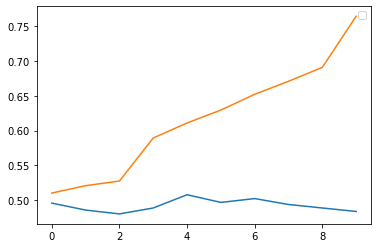

In [143]:
plt.plot(acc)
plt.plot(acc_tr)

## Gradient Boosting Classifier

In [145]:
acc = []
acc_tr = []
for i in range(50,150,10) :
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2)
    model4 = gbc(n_estimators=i).fit(X_train4, y_train4)
    pred4 = model4.predict(X_test4)
    data4 = [[list(y_test4)[i], pred4[i]] for i in range(len(pred4))]
    output4 = pd.DataFrame(data4, columns = ['Actual','Prediction'])
    pred4_train = model4.predict(X_train4)
    data4_train = [[list(y_train4)[i], pred4_train[i]] for i in range(len(pred4_train))]
    output4_train = pd.DataFrame(data4_train, columns = ['Actual','Prediction'])
    acc.append(len(output4[output4['Actual']==output4['Prediction']])/len(output4))
    acc_tr.append(len(output4_train[output4_train['Actual']==output4_train['Prediction']])/len(output4_train))

<ipython-input-146-148fd43f1a78>:3: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Test','Train')
<ipython-input-146-148fd43f1a78>:3: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Test','Train')
<ipython-input-146-148fd43f1a78>:3: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Test','Train')
<ipython-input-146-148fd43f1a78>:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_g

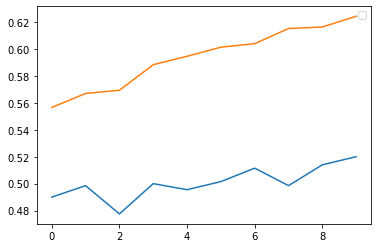

In [146]:
plt.plot(acc)
plt.plot(acc_tr)
plt.legend('Test','Train')

In [152]:
pickle.dump(model2, open('Final Model', 'wb'))